In [65]:
from joblib import Parallel, delayed
import numpy as np
import sys
sys.path.append('/home/c2032014/py_files/')
import numpy as np
import load_and_clean as lac
import rms_normalisation as rn
from stingray import Lightcurve, Powerspectrum, AveragedCrossspectrum
import dG_span_new_abs as dgs
import G_span_abs as gs
import frac_rms_span as frmss
import phase_span as phs
import fit_rms_phase as frp
import F_test as ft
import frac_rms_err_span as fres
import phase_err_span as pes
import chi_square as chis
import importlib
importlib.reload(frp)
importlib.reload(ft)
importlib.reload(gs)
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt




file1_obs1= '/home/c2032014/CYGX1/event_1pt5/ixpe01002901_det12_evt1pt5_v01_src_1.fits'
file2_obs1= '/home/c2032014/CYGX1/event_1pt5/ixpe01002901_det3_evt1pt5_v01_src.fits'
file1_obs2='/home/c2032014/cyg_june/CYGX1_JUNE/event_1pt5/ixpe01250101_det12_evt1pt5_v01_src.fits'
file2_obs2='/home/c2032014/cyg_june/CYGX1_JUNE/event_1pt5/ixpe01250101_det3_evt1pt5_v01_src.fits'
Pmin=51
Pmax=200
gti_obs1='/home/c2032014/CYGX1/event_1pt5/GTI_ixpe01002901_evt1pt5_v01_src.txt'
gti_obs2='/home/c2032014/cyg_june/CYGX1_JUNE/event_1pt5/GTI_ixpe01250101_evt1pt5_v01_src.txt'
bin_length=1/64
seg_length=16
fmin=0
fmax=4
f_bin_number=2
mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
J=mod_bin_number
spur_sub=True
coherence_corrector=False
output_file= '/home/c2032014/cygx1_paper/ABC/stack_test.npy'

In [2]:
import numpy as np

import math

a=2*np.arctan((2*(140*10**3))/(2*28000*(9.461*10**15)))
a

1.056970721911003e-15

num of events 9678209
num of events 4450789
num of events 3964407
num of events 1845919
0.0 2.0
ps_2_ref_mean calculated
cs_ref_real_mean calculated
cs_ref_abs_mean stack calculated
ps_2_ref_mean_stack calculated
 In G_span
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
G_span_obs1 calculated
 In G_span
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(ph

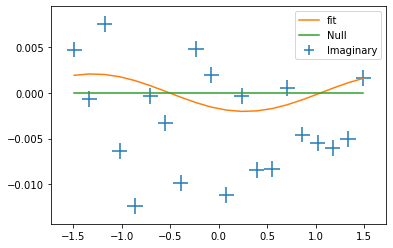

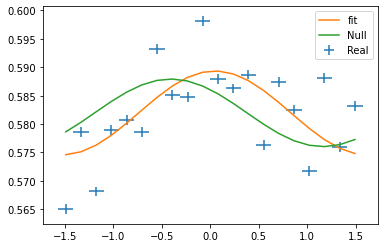

2.0 4.0
ps_2_ref_mean calculated
cs_ref_real_mean calculated
cs_ref_abs_mean stack calculated
ps_2_ref_mean_stack calculated
 In G_span
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
G_span_obs1 calculated
 In G_span
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) calculated
In G_calc
G(phi) c

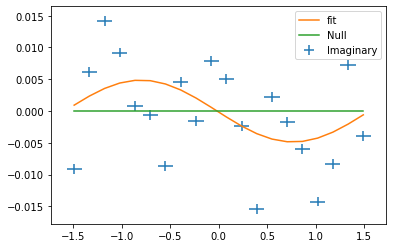

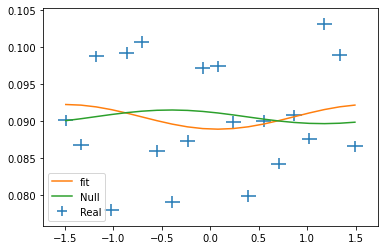

[11.63940048152964, 1.8109285590876607] [0.028893457110747006, 0.03528293032502937] [0.14679985233090265, -0.033064100690541665] [0.04086150297069141, 0.04989759842708857] [0.013501023152413416, -0.005060333664576255] [0.0408613921798351, 0.04989757207296378] [-0.03503336479182728, -0.003336534544843728] [0.04064125513885009, 0.04676655212500994] [-0.021133054479199886, -0.0972858708504809] [0.04064125514597191, 0.04676654778104621] [1. 3.] [1. 1.] [11.639533716602884, 1.8109834305068695] [0.08143467959416471, 0.012670340496827978] [-0.08655463491187879, -0.013466949233146144] [0, 0] []


array([], dtype=float64)

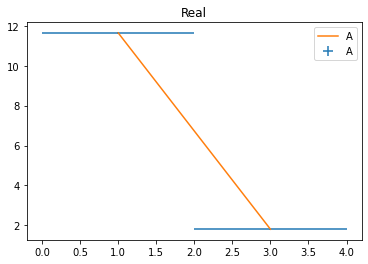

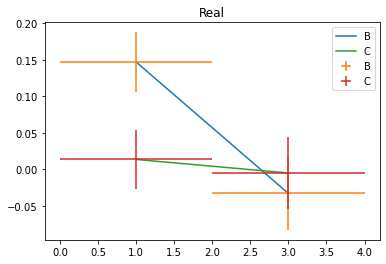

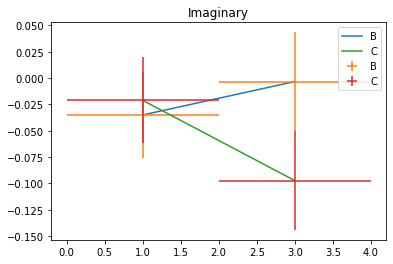

In [72]:
Q_U_NU_stack(file1_obs1,file2_obs1,
                 file1_obs2,file2_obs2
                 ,Pmin,Pmax,gti_obs1,gti_obs2,bin_length,seg_length,fmin,fmax,
                 f_bin_number,mod_min,mod_max,mod_bin_number,J,
                 spur_sub,coherence_corrector,output_file,stack=True)

In [71]:

def Q_U_NU_stack(file1_obs1,file2_obs1,
                 file1_obs2,file2_obs2
                 ,Pmin,Pmax,gti_obs1,gti_obs2,bin_length,seg_length,fmin,fmax,
           f_bin_number,mod_min,mod_max,mod_bin_number,J,
           spur_sub,coherence_corrector,output_file,stack=True):
    
    
    #Make frequency array
    fspace = np.linspace(fmin, fmax, f_bin_number + 1)
    f_angle_list=[(fspace[i-1],fspace[i]) for i in range(1,len(fspace))] 
    f_min_array = fspace[:-1]
    f_max_array = fspace[1:]
    av_f = (f_min_array + f_max_array) / 2
    av_f_err = (f_max_array - f_min_array) / 2


    #Make modulation angle array
    aspace = np.linspace(mod_min, mod_max, mod_bin_number + 1)
    mod_min_array = aspace[:-1]
    mod_max_array = aspace[1:]
    av_mod = (mod_min_array + mod_max_array) / 2
    av_mod_err = (mod_max_array - mod_min_array) / 2

    
    #Define sinusoidal models to fit Re[G] and Im[G] 
    def cross_spec_model_real(phi,A,B,C):
        Re_G=(1/J) * ( A + (B*np.cos(2*phi)) + (C*np.sin(2*phi)) )
        return Re_G

    #The imaginary sinusoid does not have the A term
    def cross_spec_model_imag(phi,B,C):
        Im_G=(1/J) * ( (B*np.cos(2*phi)) + (C*np.sin(2*phi)) )
        return Im_G
    

     
    #Loading GTI
    GTI_obs1=list(np.loadtxt(str(gti_obs1)))
    GTI_obs2=list(np.loadtxt(str(gti_obs2)))

    #Loading and cleaning data
    data_1_obs1,header_1_obs1,*_=lac.load_and_clean(file1_obs1,Pmin,Pmax)
    data_2_obs1,header_2_obs1,*_=lac.load_and_clean(file2_obs1,Pmin,Pmax)

    data_1_obs2,header_1_obs2,*_=lac.load_and_clean(file1_obs2,Pmin,Pmax)
    data_2_obs2,header_2_obs2,*_=lac.load_and_clean(file2_obs2,Pmin,Pmax)



    #All mod bins file 1 lc
    lc_1_ref_obs1=Lightcurve.make_lightcurve(data_1_obs1['TIME'],dt=bin_length,gti=GTI_obs1)
    lc_1_ref_obs1.apply_gtis()

    #All mod bins file 2 lc
    lc_2_ref_obs1=Lightcurve.make_lightcurve(data_2_obs1['TIME'],dt=bin_length,gti=GTI_obs1)
    lc_2_ref_obs1.apply_gtis()

    #Required fourier products
    ps_2_ref_obs1=Powerspectrum.from_lightcurve(lc_2_ref_obs1,seg_length,norm='abs')
    cs_ref_obs1=AveragedCrossspectrum.from_lightcurve(lc_1_ref_obs1,lc_2_ref_obs1,seg_length,norm='abs')

    lc_1_ref_obs2=Lightcurve.make_lightcurve(data_1_obs2['TIME'],dt=bin_length,gti=GTI_obs2)
    lc_1_ref_obs2.apply_gtis()

    lc_2_ref_obs2=Lightcurve.make_lightcurve(data_2_obs2['TIME'],dt=bin_length,gti=GTI_obs2)
    lc_2_ref_obs2.apply_gtis()

    ps_2_ref_obs2=Powerspectrum.from_lightcurve(lc_2_ref_obs2,seg_length,norm='abs')
    cs_ref_obs2=AveragedCrossspectrum.from_lightcurve(lc_1_ref_obs2,lc_2_ref_obs2,seg_length,norm='abs')


    
    #Defining stokes parameters

    I=len(data_1_obs1['TIME'])+len(data_2_obs1['TIME'])+len(data_1_obs2['TIME'])+len(data_2_obs2['TIME'])

    Q_norm=(np.sum(data_1_obs1['Q'])+np.sum(data_2_obs1['Q'])+np.sum(data_1_obs2['Q'])+np.sum(data_2_obs2['Q']))/I

    U_norm=(np.sum(data_1_obs1['U'])+np.sum(data_2_obs1['U'])+np.sum(data_1_obs2['U'])+np.sum(data_1_obs2['U']))/I

    
    #NULL HYPOTHESIS: If PD/PA are constant then the cross spectrum becomes:
    def cross_spec_model_null(phi,C_nu_mag_sqrd):
        ReG_null=(1/J) *C_nu_mag_sqrd* (1 + Q_norm*np.cos(2*phi) + U_norm*np.sin(2*phi))
        return ReG_null

    #so the real part is some constant M*C_nu_mag_sqrd and the im part is 0

    #Define arrays to store results
    A_real=[]
    B_real=[]
    C_real=[]

    A_real_err_arr=[]
    B_real_err_arr=[]
    C_real_err_arr=[]

    B_imag_err_arr=[]
    C_imag_err_arr=[]

    B_imag=[]
    C_imag=[]

    G_null_real_arr=[]
    G_null_imag_arr=[]

    A_null_real_arr=[]
    B_null_real_arr=[]
    C_null_real_arr=[]

    #A_null_real_err_arr=[]
    #B_null_real_err_arr=[]
    #C_null_real_err_arr=[]

    B_null_imag_arr=[]
    C_null_imag_arr=[]

    #Iterating over each frequency bin

    for i in range(len(f_angle_list)):
        
        f_min=f_angle_list[i][0]
        f_max=f_angle_list[i][1]
        print(f_min,f_max)
        
        ps_2_ref_mean_obs1=ps_2_ref_obs1.power[(f_min<=ps_2_ref_obs1.freq) & (ps_2_ref_obs1.freq<=f_max)].mean()
        ps_2_ref_mean_obs2=ps_2_ref_obs2.power[(f_min<=ps_2_ref_obs2.freq) & (ps_2_ref_obs2.freq<=f_max)].mean()

        print('ps_2_ref_mean calculated')

        cs_ref_real_mean_obs1=np.array(cs_ref_obs1.power.real[(f_min<=cs_ref_obs1.freq) & (cs_ref_obs1.freq<=f_max)].mean())
        cs_ref_im_mean_obs1=np.array(cs_ref_obs1.power.imag[(f_min<=cs_ref_obs1.freq) & (cs_ref_obs1.freq<=f_max)].mean())

        cs_ref_real_mean_obs2=np.array(cs_ref_obs2.power.real[(f_min<=cs_ref_obs2.freq) & (cs_ref_obs2.freq<=f_max)].mean())  #same as A within errors
        cs_ref_im_mean_obs2=np.array(cs_ref_obs2.power.imag[(f_min<=cs_ref_obs2.freq) & (cs_ref_obs2.freq<=f_max)].mean())

        print('cs_ref_real_mean calculated')

        #stacking cs_ref_mean_obs1 and cs_ref_mean_obs2

        cs_ref_real_mean_stack=((cs_ref_obs1.m*cs_ref_real_mean_obs1)+(cs_ref_obs2.m*cs_ref_real_mean_obs2))/(cs_ref_obs1.m+cs_ref_obs2.m)
        cs_ref_im_mean_stack=((cs_ref_obs1.m*cs_ref_im_mean_obs1)+(cs_ref_obs2.m*cs_ref_im_mean_obs2))/(cs_ref_obs1.m+cs_ref_obs2.m)



        cs_ref_complex_mean_stack=cs_ref_real_mean_stack+1j*cs_ref_im_mean_stack
        cs_ref_abs_mean_stack=np.abs(cs_ref_complex_mean_stack)

        print('cs_ref_abs_mean stack calculated')

        #stacking ps2 _ref_mean_obs1 and ps2_ref_mean_obs2

        ps_2_ref_mean_stack=((ps_2_ref_obs1.m*ps_2_ref_mean_obs1)+(ps_2_ref_obs2.m*ps_2_ref_mean_obs2))/(ps_2_ref_obs1.m+ps_2_ref_obs2.m)
        
        print('ps_2_ref_mean_stack calculated')

        #cs_ref_complex_mean_obs1=cs_ref_real_mean_obs1+1j*cs_ref_im_mean_obs1
        #cs_ref_abs_mean_obs1=np.abs(cs_ref_complex_mean_obs1)
        
        #cs_ref_complex_mean_obs2=cs_ref_real_mean_obs2+1j*cs_ref_im_mean_obs2
        #cs_ref_abs_mean_obs2=np.abs(cs_ref_complex_mean_obs2)

        
        

        norm='abs'
        
        #Calculate G and dG
        
        G_real_span_obs1, G_im_span_obs1, n_span_obs1, m_span_obs1,lc_1_sub_span_obs1, *_=gs.G_span(mod_bin_number,data_1_obs1,lc_2_ref_obs1,GTI_obs1,bin_length,seg_length,f_min,f_max,spur_sub,norm)
        print('G_span_obs1 calculated')
        G_real_span_obs2, G_im_span_obs2, n_span_obs2, m_span_obs2,lc_1_sub_span_obs2, *_=gs.G_span(mod_bin_number,data_1_obs2,lc_2_ref_obs2,GTI_obs2,bin_length,seg_length,f_min,f_max,spur_sub,norm)
        print('G_span_obs2 calculated')

        #Calulating an average G weighted on the number of segments m

        G_real_span_stack=(np.array(m_span_obs1)*np.array(G_real_span_obs1)+np.array(m_span_obs2)*np.array(G_real_span_obs2))/(np.array(m_span_obs1)+np.array(m_span_obs2))
        G_im_span_stack=(np.array(m_span_obs1)*np.array(G_im_span_obs1)+np.array(m_span_obs2)*np.array(G_im_span_obs2))/(np.array(m_span_obs1)+np.array(m_span_obs2))

        
       

        
       
        
        dG_span_stack= dgs.dG_span(G_real_span_stack,G_im_span_stack,lc_1_sub_span_obs1,n_span_obs1,
                m_span_obs1,f_min,f_max,seg_length,
                ps_2_ref_mean_stack,cs_ref_real_mean_stack,coherence_corrector,stack,lc_1_sub_span_obs2,
                n_span_obs2,m_span_obs2)
        
        
        
        #Now to stack 

        #Fit real and im parts of G
        parameters_real,pcovreal=curve_fit(cross_spec_model_real,np.array(av_mod),np.array(G_real_span_stack))
        A_real.append(parameters_real[0])
        print('A',parameters_real[0])
        B_real.append(parameters_real[1])
        C_real.append(parameters_real[2])
        fit_real = cross_spec_model_real(np.array(av_mod),parameters_real[0],parameters_real[1],parameters_real[2])

        parameters_imag,pcovimag=curve_fit(cross_spec_model_imag,np.array(av_mod),np.array(G_im_span_stack))
        B_imag.append(parameters_imag[0])
        C_imag.append(parameters_imag[1])
        fit_imag = cross_spec_model_imag(np.array(av_mod),parameters_imag[0],parameters_imag[1])

        Areal_err,Breal_err,Creal_err= np.sqrt(np.diag(pcovreal))
        A_real_err_arr.append(Areal_err)
        B_real_err_arr.append(Breal_err)
        C_real_err_arr.append(Creal_err)
        Bimag_err,Cimag_err= np.sqrt(np.diag(pcovimag))
        B_imag_err_arr.append(Bimag_err)
        C_imag_err_arr.append(Cimag_err)


        G_null=cross_spec_model_null(np.array(av_mod),cs_ref_abs_mean_stack)
        
        G_null_real=G_null.real
        #print('G_null_real',G_null_real)
        #G_null_real_arr.append(G_null_real)
        G_null_imag=G_null.imag

        A_null_real=cs_ref_abs_mean_stack
        B_null_real=cs_ref_abs_mean_stack*Q_norm
        C_null_real=cs_ref_abs_mean_stack*U_norm

        A_null_real_arr.append(A_null_real)
        B_null_real_arr.append(B_null_real)
        C_null_real_arr.append(C_null_real)
        B_null_imag=0
        C_null_imag=0
        B_null_imag_arr.append(B_null_imag)
        plt.figure()
        plt.errorbar(av_mod,G_im_span_stack,xerr=av_mod_err,yerr=np.array(dG_span_stack)/(2*np.pi),ls='None',label='Imaginary')
        plt.plot(av_mod,fit_imag,label='fit')
        plt.plot(av_mod,G_null_imag,label='Null')
        plt.legend()
        plt.show()


        plt.figure()
        plt.errorbar(av_mod,G_real_span_stack,xerr=av_mod_err,yerr=np.array(dG_span_stack)/(2*np.pi),ls='None',label='Real')
        plt.plot(av_mod,fit_real,label='fit')
        plt.plot(av_mod,G_null_real,label='Null')
        plt.legend()
        plt.show()
        

    #Plot results

    #plt.figure()
    #plt.title('Re[G] (null)')
    #plt.ylabel('Re[G] (null)')
    #plt.plot(av_f,G_null_real_arr,'.')
    #plt.xlabel('Frequency (Hz)')
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.show()

    plt.figure()
    plt.title('Real')
    plt.errorbar(av_f,A_real,xerr=av_f_err,yerr=Areal_err,ls='None',label='A')
    plt.plot(av_f,A_real,label='A')
    plt.legend()
    plt.figure()
    plt.title('Real')
    plt.plot(av_f,B_real,label='B')
    plt.errorbar(av_f,B_real,xerr=av_f_err,yerr=B_real_err_arr,ls='None',label='B')
    plt.plot(av_f,C_real,label='C')
    plt.errorbar(av_f,C_real,xerr=av_f_err,yerr=C_real_err_arr,ls='None',label='C')
    plt.legend()

    plt.figure()
    plt.title('Imaginary')
    plt.plot(av_f,B_imag,label='B')
    plt.errorbar(av_f,B_imag,xerr=av_f_err,yerr=B_imag_err_arr,ls='None',label='B')
    plt.plot(av_f,C_imag,label='C')
    plt.errorbar(av_f,C_imag,xerr=av_f_err,yerr=C_imag_err_arr,ls='None',label='C')
    plt.legend()
    print(A_real,A_real_err_arr,B_real,B_real_err_arr,C_real,C_real_err_arr,B_imag,B_imag_err_arr,C_imag,C_imag_err_arr,av_f,av_f_err,A_null_real_arr,B_null_real_arr,C_null_real_arr,B_null_imag_arr,C_null_imag_arr)
    results=np.array(tuple(zip(A_real,A_real_err_arr,B_real,B_real_err_arr,C_real,C_real_err_arr,B_imag,B_imag_err_arr,C_imag,C_imag_err_arr,av_f,av_f_err,A_null_real_arr,B_null_real_arr,C_null_real_arr,B_null_imag_arr,C_null_imag_arr)))
    np.save(output_file,results)
    return results


In [8]:

    
#Make frequency array
fspace = np.linspace(fmin, fmax, f_bin_number + 1)
f_angle_list=[(fspace[i-1],fspace[i]) for i in range(1,len(fspace))] 
f_min_array = fspace[:-1]
f_max_array = fspace[1:]
av_f = (f_min_array + f_max_array) / 2
av_f_err = (f_max_array - f_min_array) / 2


#Make modulation angle array
aspace = np.linspace(mod_min, mod_max, mod_bin_number + 1)
mod_min_array = aspace[:-1]
mod_max_array = aspace[1:]
av_mod = (mod_min_array + mod_max_array) / 2
av_mod_err = (mod_max_array - mod_min_array) / 2


#Define sinusoidal models to fit Re[G] and Im[G] 
def cross_spec_model_real(phi,A,B,C):
    Re_G=(1/J) * ( A + (B*np.cos(2*phi)) + (C*np.sin(2*phi)) )
    return Re_G

#The imaginary sinusoid does not have the A term
def cross_spec_model_imag(phi,B,C):
    Im_G=(1/J) * ( (B*np.cos(2*phi)) + (C*np.sin(2*phi)) )
    return Im_G


    
#Loading GTI
GTI_obs1=list(np.loadtxt(str(gti_obs1)))
GTI_obs2=list(np.loadtxt(str(gti_obs2)))

#Loading and cleaning data
data_1_obs1,header_1_obs1,*_=lac.load_and_clean(file1_obs1,Pmin,Pmax)
data_2_obs1,header_2_obs1,*_=lac.load_and_clean(file2_obs1,Pmin,Pmax)

data_1_obs2,header_1_obs2,*_=lac.load_and_clean(file1_obs2,Pmin,Pmax)
data_2_obs2,header_2_obs2,*_=lac.load_and_clean(file2_obs2,Pmin,Pmax)



#All mod bins file 1 lc
lc_1_ref_obs1=Lightcurve.make_lightcurve(data_1_obs1['TIME'],dt=bin_length,gti=GTI_obs1)
lc_1_ref_obs1.apply_gtis()

#All mod bins file 2 lc
lc_2_ref_obs1=Lightcurve.make_lightcurve(data_2_obs1['TIME'],dt=bin_length,gti=GTI_obs1)
lc_2_ref_obs1.apply_gtis()

#Required fourier products
ps_2_ref_obs1=Powerspectrum.from_lightcurve(lc_2_ref_obs1,seg_length,norm='abs')
cs_ref_obs1=AveragedCrossspectrum.from_lightcurve(lc_1_ref_obs1,lc_2_ref_obs1,seg_length,norm='abs')

lc_1_ref_obs2=Lightcurve.make_lightcurve(data_1_obs2['TIME'],dt=bin_length,gti=GTI_obs2)
lc_1_ref_obs2.apply_gtis()

lc_2_ref_obs2=Lightcurve.make_lightcurve(data_2_obs2['TIME'],dt=bin_length,gti=GTI_obs2)
lc_2_ref_obs2.apply_gtis()

ps_2_ref_obs2=Powerspectrum.from_lightcurve(lc_2_ref_obs2,seg_length,norm='abs')
cs_ref_obs2=AveragedCrossspectrum.from_lightcurve(lc_1_ref_obs2,lc_2_ref_obs2,seg_length,norm='abs')



#Defining stokes parameters

I=len(data_1_obs1['TIME'])+len(data_2_obs1['TIME'])+len(data_1_obs2['TIME'])+len(data_2_obs2['TIME'])

Q_norm=(np.sum(data_1_obs1['Q'])+np.sum(data_2_obs1['Q'])+np.sum(data_1_obs2['Q'])+np.sum(data_2_obs2['Q']))/I

U_norm=(np.sum(data_1_obs1['U'])+np.sum(data_2_obs1['U'])+np.sum(data_1_obs2['U'])+np.sum(data_1_obs2['U']))/I


#NULL HYPOTHESIS: If PD/PA are constant then the cross spectrum becomes:
def cross_spec_model_null(phi,C_nu_mag_sqrd):
    ReG_null=(1/J) *C_nu_mag_sqrd* (1 + Q_norm*np.cos(2*phi) + U_norm*np.sin(2*phi))
    return ReG_null

#so the real part is some constant M*C_nu_mag_sqrd and the im part is 0

#Define arrays to store results
A_real=[]
B_real=[]
C_real=[]

A_real_err_arr=[]
B_real_err_arr=[]
C_real_err_arr=[]

B_imag_err_arr=[]
C_imag_err_arr=[]

B_imag=[]
C_imag=[]

G_null_real_arr=[]
G_null_imag_arr=[]

A_null_real_arr=[]
B_null_real_arr=[]
C_null_real_arr=[]

#A_null_real_err_arr=[]
#B_null_real_err_arr=[]
#C_null_real_err_arr=[]

B_null_imag_arr=[]
C_null_imag_arr=[]

#Iterating over each frequency bin

for i in range(len(f_angle_list)):
    
    f_min=f_angle_list[i][0]
    f_max=f_angle_list[i][1]
    print(f_min,f_max)
    
    ps_2_ref_mean_obs1=ps_2_ref_obs1.power[(f_min<=ps_2_ref_obs1.freq) & (ps_2_ref_obs1.freq<=f_max)].mean()
    ps_2_ref_mean_obs2=ps_2_ref_obs2.power[(f_min<=ps_2_ref_obs2.freq) & (ps_2_ref_obs2.freq<=f_max)].mean()

    print('ps_2_ref_mean calculated')

    cs_ref_real_mean_obs1=np.array(cs_ref_obs1.power.real[(f_min<=cs_ref_obs1.freq) & (cs_ref_obs1.freq<=f_max)].mean())
    cs_ref_im_mean_obs1=np.array(cs_ref_obs1.power.imag[(f_min<=cs_ref_obs1.freq) & (cs_ref_obs1.freq<=f_max)].mean())

    cs_ref_real_mean_obs2=np.array(cs_ref_obs2.power.real[(f_min<=cs_ref_obs2.freq) & (cs_ref_obs2.freq<=f_max)].mean())  #same as A within errors
    cs_ref_im_mean_obs2=np.array(cs_ref_obs2.power.imag[(f_min<=cs_ref_obs2.freq) & (cs_ref_obs2.freq<=f_max)].mean())

    print('cs_ref_real_mean calculated')

    #stacking cs_ref_mean_obs1 and cs_ref_mean_obs2

    cs_ref_real_mean_stack=((cs_ref_obs1.m*cs_ref_real_mean_obs1)+(cs_ref_obs2.m*cs_ref_real_mean_obs2))/(cs_ref_obs1.m+cs_ref_obs2.m)
    cs_ref_im_mean_stack=((cs_ref_obs1.m*cs_ref_im_mean_obs1)+(cs_ref_obs2.m*cs_ref_im_mean_obs2))/(cs_ref_obs1.m+cs_ref_obs2.m)



    cs_ref_complex_mean_stack=cs_ref_real_mean_stack+1j*cs_ref_im_mean_stack
    cs_ref_abs_mean_stack=np.abs(cs_ref_complex_mean_stack)

    print('cs_ref_abs_mean stack calculated')

    #stacking ps2 _ref_mean_obs1 and ps2_ref_mean_obs2

    ps_2_ref_mean_stack=((ps_2_ref_obs1.m*ps_2_ref_mean_obs1)+(ps_2_ref_obs2.m*ps_2_ref_mean_obs2))/(ps_2_ref_obs1.m+ps_2_ref_obs2.m)
    
    print('ps_2_ref_mean_stack calculated')

    #cs_ref_complex_mean_obs1=cs_ref_real_mean_obs1+1j*cs_ref_im_mean_obs1
    #cs_ref_abs_mean_obs1=np.abs(cs_ref_complex_mean_obs1)
    
    #cs_ref_complex_mean_obs2=cs_ref_real_mean_obs2+1j*cs_ref_im_mean_obs2
    #cs_ref_abs_mean_obs2=np.abs(cs_ref_complex_mean_obs2)


    

    norm='abs'
    
    #Calculate G and dG
    
    G_real_span_obs1, G_im_span_obs1, n_span_obs1, m_span_obs1,lc_1_sub_span_obs1, *_=gs.G_span(mod_bin_number,data_1_obs1,lc_2_ref_obs1,GTI_obs1,bin_length,seg_length,f_min,f_max,spur_sub,norm)
    print('G_span_obs1 calculated')
    G_real_span_obs2, G_im_span_obs2, n_span_obs2, m_span_obs2,lc_1_sub_span_obs2, *_=gs.G_span(mod_bin_number,data_1_obs2,lc_2_ref_obs2,GTI_obs2,bin_length,seg_length,f_min,f_max,spur_sub,norm)
    print('G_span_obs2 calculated')

    #Calulating an average G weighted on the number of segments m

    G_real_span_stack=(np.array(m_span_obs1)*np.array(G_real_span_obs1)+np.array(m_span_obs2)*np.array(G_real_span_obs2))/(np.array(m_span_obs1)+np.array(m_span_obs2))
    G_im_span_stack=(np.array(m_span_obs1)*np.array(G_im_span_obs1)+np.array(m_span_obs2)*np.array(G_im_span_obs2))/(np.array(m_span_obs1)+np.array(m_span_obs2))

        
       
        
    


num of events 9678209
num of events 4450789
num of events 3964407
num of events 1845919
0.0 2.0
ps_2_ref_mean calculated
cs_ref_real_mean calculated
cs_ref_abs_mean stack calculated
ps_2_ref_mean_stack calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G_span_obs1 calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G(phi) calculated
G_span_obs2 calculated


TypeError: can't multiply sequence by non-int of type 'tuple'

In [9]:
G_real_span_stack=(np.array(m_span_obs1)*np.array(G_real_span_obs1)+np.array(m_span_obs2)*np.array(G_real_span_obs2))/(np.array(m_span_obs1)+np.array(m_span_obs2))
G_im_span_stack=(np.array(m_span_obs1)*np.array(G_im_span_obs1)+np.array(m_span_obs2)*np.array(G_im_span_obs2))/(np.array(m_span_obs1)+np.array(m_span_obs2))

        
       
        
    

In [56]:
importlib.reload(dgs)

dG_span_stack= dgs.dG_span(G_real_span_stack,G_im_span_stack,lc_1_sub_span_obs1,n_span_obs1,
                m_span_obs1,f_min,f_max,seg_length,
                ps_2_ref_mean_stack,cs_ref_real_mean_stack,coherence_corrector,stack,lc_1_sub_span_obs2,
                n_span_obs2,m_span_obs2)
        

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'stack', 'span2', 'n2', 'm2', 'dG')
Lightcurve
__________
time           : [1.69402263e+08 ... 1.69926652e+08] (size 15824347)
time (MJD)     : [1960.67434037 ... 1966.74365732]
countrate      : [0. ... 0.] (size 15824347)
counts         : [0 ... 0] (size 15824347)
mask           : [ True ...  True] (size 15824347)
tstart         : [1.69402263e+08 ... 1.69926652e+08] (size 15824347)
tstart (MJD)   : [1960.67434028 ... 1966.74365723]
dt             : 0.015625
err_dist       : poisson
high_precision : False
input_counts   : True
low_memory     : False
mjdref         : 0
notes          : 
tseg           : 524389.0
tseg (MJD)     : 6.0693171296296295
gti            : [[1.69402263e+08 1.69405704e+08]
 ...
 [1.69926372e+08 1.69926652e+08]] (shape (407, 2))
gti (MJD)      : [[1960.67434028 1960.71416102]
 ...
 [1966.74041247 1966.74365741]]

32
(32, 32, 32, 32, 32, 

A 11.63940048152964


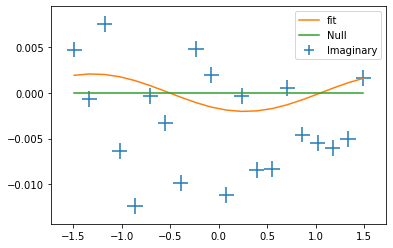

[1. 3.]
[11.63940048152964, 11.63940048152964, 11.63940048152964, 11.63940048152964, 11.63940048152964]


ValueError: 'x' and 'y' must have the same size

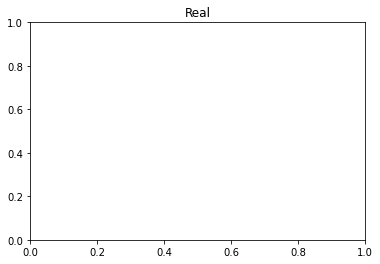

In [63]:
#Fit real and im parts of G
parameters_real,pcovreal=curve_fit(cross_spec_model_real,np.array(av_mod),np.array(G_real_span_stack))
A_real.append(parameters_real[0])
print('A',parameters_real[0])
B_real.append(parameters_real[1])
C_real.append(parameters_real[2])
fit_real = cross_spec_model_real(np.array(av_mod),parameters_real[0],parameters_real[1],parameters_real[2])

parameters_imag,pcovimag=curve_fit(cross_spec_model_imag,np.array(av_mod),np.array(G_im_span_stack))
B_imag.append(parameters_imag[0])
C_imag.append(parameters_imag[1])
fit_imag = cross_spec_model_imag(np.array(av_mod),parameters_imag[0],parameters_imag[1])

Areal_err,Breal_err,Creal_err= np.sqrt(np.diag(pcovreal))
A_real_err_arr.append(Areal_err)
B_real_err_arr.append(Breal_err)
C_real_err_arr.append(Creal_err)
Bimag_err,Cimag_err= np.sqrt(np.diag(pcovimag))
B_imag_err_arr.append(Bimag_err)
C_imag_err_arr.append(Cimag_err)


G_null=cross_spec_model_null(np.array(av_mod),cs_ref_abs_mean_stack)

G_null_real=G_null.real
#print('G_null_real',G_null_real)
#G_null_real_arr.append(G_null_real)
G_null_imag=G_null.imag

A_null_real=cs_ref_abs_mean_stack
B_null_real=cs_ref_abs_mean_stack*Q_norm
C_null_real=cs_ref_abs_mean_stack*U_norm

A_null_real_arr.append(A_null_real)
B_null_real_arr.append(B_null_real)
C_null_real_arr.append(C_null_real)
B_null_imag=0
C_null_imag=0
B_null_imag_arr.append(B_null_imag)
plt.errorbar(av_mod,G_im_span_stack,xerr=av_mod_err,yerr=np.array(dG_span_stack)/(2*np.pi),ls='None',label='Imaginary')
plt.plot(av_mod,fit_imag,label='fit')
plt.plot(av_mod,G_null_imag,label='Null')
plt.legend()
plt.show()


#Plot results

#plt.figure()
#plt.title('Re[G] (null)')
#plt.ylabel('Re[G] (null)')
#plt.plot(av_f,G_null_real_arr,'.')
#plt.xlabel('Frequency (Hz)')
#plt.xscale('log')
#plt.yscale('log')
#plt.show()

print(av_f)
print(A_real)
plt.figure()
plt.title('Real')
plt.errorbar(av_f,A_real,xerr=av_f_err,yerr=Areal_err,ls='None',label='A')
plt.plot(av_f,A_real,label='A')
plt.legend()
plt.figure()
plt.title('Real')
plt.plot(av_f,B_real,label='B')
plt.errorbar(av_f,B_real,xerr=av_f_err,yerr=B_real_err_arr,ls='None',label='B')
plt.plot(av_f,C_real,label='C')
plt.errorbar(av_f,C_real,xerr=av_f_err,yerr=C_real_err_arr,ls='None',label='C')
plt.legend()

plt.figure()
plt.title('Imaginary')
plt.plot(av_f,B_imag,label='B')
plt.errorbar(av_f,B_imag,xerr=av_f_err,yerr=B_imag_err_arr,ls='None',label='B')
plt.plot(av_f,C_imag,label='C')
plt.errorbar(av_f,C_imag,xerr=av_f_err,yerr=C_imag_err_arr,ls='None',label='C')
plt.legend()
print(A_real,A_real_err_arr,B_real,B_real_err_arr,C_real,C_real_err_arr,B_imag,B_imag_err_arr,C_imag,C_imag_err_arr,av_f,av_f_err,A_null_real_arr,B_null_real_arr,C_null_real_arr,B_null_imag_arr,C_null_imag_arr)
results=np.array(tuple(zip(A_real,A_real_err_arr,B_real,B_real_err_arr,C_real,C_real_err_arr,B_imag,B_imag_err_arr,C_imag,C_imag_err_arr,av_f,av_f_err,A_null_real_arr,B_null_real_arr,C_null_real_arr,B_null_imag_arr,C_null_imag_arr)))
np.save(output_file,results)
#return results